# 판다스(Pandas) 3


여기서는 아래의 내용을 다룬다.
* lambda, apply(), transform() 메서드
* groupby + apply(), transform() 메서드  
    → 결측치(missing data) 처리, 이상치(outlier) 처리
* 데이터 시각화
  * 상자 그림(box plot)


우선 수업에서 필요한 모듈을 임포트하자.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## lambda

파이썬은 익명함수 또는 lambda 함수라고 하는, 값을 반환하는 단순한 한 문장으로 이루어진 함수를 지원한다. 람다 함수는 데이터 분석에서는 특히 편리한데, 이는 람다함수를 사용하면 코드를 적게 쓰며, 코드도 더 간결해지기 때문이다.   

람다 함수는 아래와 같이 사용한다. 

> lambda *arguments* : *expression*   

예제와 함께 살펴보자.


예를 들어, 숫자를 인자로 받아 5를 더한 값을 반환하는 함수는 아래와 같이 정의할 수 있다. 

In [ ]:
def plus_5(n) :
    return n + 5

In [ ]:
print(plus_5(10)) #15
print(plus_5(7))  #12

15
12


람다 함수를 사용하면, 아래와 같이 코드를 작성할 수 있다. 

In [ ]:
x = lambda a : a + 5
print(x(10)) #15
print(x(7)) #12

15
12


두 개의 argument의 곱을 리턴하는 코드는 아래와 같다. 

In [ ]:
x = lambda a, b : a * b
print(x(3, 7))  #21

21


**map() 함수**  

> `map(func, iterable)`  

`map()`은 내장함수로, `iterable`의 각 항목에 `func`를 실행한 결과를 묶어서 돌려준다.

* `iterable`은 반복 가능한 객체로, 예를 들어, 리스트, 튜플 등을 말한다. 
* `func`은 `iterable`에 실행할 함수다.

예를 들어, 두 정수를 입력받아, 두 정수의 합을 출력하는 코드를 작성할 때 `map()`를 사용할 수 있다(강의노트5 [입력과 출력] 참고).

```
numA, numB = map(int, input("두 정수를 콤마(,)로 구분하여 입력하세요 : ").split(","))
print(numA, "+", numB, "= ", numA + numB)
```

예를 들어, 리스트`[1, 2, 3, 4, 5]`의 각 항목을 제곱한 다음 5를 더한 값을 항목으로 갖는 리스트`[6, 9, 14, 21, 30]`를 만들 때, `map()`함수를 사용할 수 있다. 


In [ ]:
a = [1, 2, 3, 4, 5]
b = list(map(lambda x : x ** 2 + 5, a))
b

[6, 9, 14, 21, 30]

## apply() 메서드

`df.apply()` 메서드는 데이터프레임의 행 또는 열을 따라 인자로 입력된 함수를 적용한다. 

`df.apply()`메서드의 aixs 키워드(default는 axis = 0)는 행을 기준으로 할지, 열을 기준으로 할지를 결정한다.
  * axis = 0은 열별로 함수를 적용
  * axis = 1은 행별로 함수를 적용

예제를 통해 살펴보자.

In [ ]:
df = pd.DataFrame([[4, 9]] * 3, columns = ['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


각 열에 `np.sqrt()` 함수를 적용해보자.  
참고) `np.sqrt()`는 제곱근을 반환하는 함수이다.  

In [ ]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


`apply()`메서드를 사용해도 데이터프레임df는 변하지 않는다. 

In [ ]:
df

,A,B
0,4,9
1,4,9
2,4,9


각 열별로 합을 구해보자. 아래는 각 열의 합을 구하기 위해 `np.sum()`을 사용했다. 

In [ ]:
df.apply(np.sum, axis = 0) #axis의 default 값은 0

A    12
B    27
dtype: int64

그러면 열 단위로 집계된 결과를 확인할 수 있다. 

이번에는 각 행별로 합을 구해보자. 각 행별로 `np.sum()`함수를 적용하기 위해 axis = 1로 둔다. 

In [ ]:
df.apply(np.sum, axis = 1)

0    13
1    13
2    13
dtype: int64

`apply()`메서드의 인자로 람다함수를 사용해보자. 아래는 10을 더한 값을 반환하는 함수를 적용한 코드이다. 

In [ ]:
df.apply(lambda x : x + 10)

,A,B
0,14,19
1,14,19
2,14,19


물론, 다음과 같이 실제 함수를 정의한 다음 `apply()`메서드의 인자로 사용할 수도 있다.  
하지만 람다함수를 사용하면 실제 함수를 사용할 때보다 더 적게, 더 간결하게 코드를 작성할 수 있다. 

In [ ]:
def plus_10(n) :
    return n + 10

In [ ]:
df.apply(plus_10)

,A,B
0,14,19
1,14,19
2,14,19


데이터프레임df의 A열에 100을 더한 값을 반환하는 함수를 적용해보자. 

In [ ]:
df.A.apply(lambda x : x + 100)

0    104
1    104
2    104
Name: A, dtype: int64

예제) 데이터프레임df의 각 행별로 최솟값을 구하는 코드를 작성해보자.  
최솟값은 `min()`으로 구할 수 있다.  

In [ ]:
df.apply(lambda x : x.min(), axis = 1)

0    4
1    4
2    4
dtype: int64

## transform() 메서드  

`df.transform()` 메서드는 인자로 입력된 함수에 의해 변환된 값을 가진 데이터프레임을 만든다.  
* aixs = 0 은 열별로 함수를 적용
* axis = 1 은 행별로 함수를 적용  

예제를 통해 살펴보자.


In [ ]:
df

,A,B
0,4,9
1,4,9
2,4,9


데이터프레임 df의 모양(shape)은 (3, 2)이다.

In [ ]:
df.shape

(3, 2)

데이터프레임 df에 `np.sqrt`를 적용하는 코드는 아래와 같다. 

In [ ]:
df.transform(np.sqrt) #모양(shape)은 df와 같다.

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


각 열별로 `np.sqrt`와 `np.exp`를 적용하는 코드는 아래와 같다. 

In [ ]:
df.transform([np.sqrt, np.exp], axis = 0) 

A              B             
  sqrt       exp sqrt          exp
0  2.0  54.59815  3.0  8103.083928
1  2.0  54.59815  3.0  8103.083928
2  2.0  54.59815  3.0  8103.083928

생성된 데이터프레임의 모양(shape)은 (3, 4)이다. 

In [ ]:
df.transform([np.sqrt, np.exp], axis = 0).shape  #df와 행의 길이가 같다. 

(3, 4)

각 행별로 `np.sqrt`와 `np.exp`를 적용하는 코드는 아래와 같다. 





In [ ]:
df.transform([np.sqrt, np.exp], axis = 1)

A            B
0 sqrt   2.00000     3.000000
  exp   54.59815  8103.083928
1 sqrt   2.00000     3.000000
  exp   54.59815  8103.083928
2 sqrt   2.00000     3.000000
  exp   54.59815  8103.083928

생성된 데이터프레임의 모양(shape)은 (6, 2)이다. 

In [ ]:
df.transform([np.sqrt, np.exp], axis = 1).shape  #df와 열의 길이가 같다. 

(6, 2)

df의 A열에 5를 더한 값을 반환하는 함수를 적용하면 아래와 같다.

In [ ]:
df.A.transform(plus_5)

0    9
1    9
2    9
Name: A, dtype: int64

주의) `apply()`와 `transform()`은 다르다. 예를 들어, `transform()`은 집계된 결과를 만들지 못한다.  
아래와 같이 `transform()` 메서드를 이용하여 각 열별 합을 구하려고 하면 오류가 발생한다.  

```python
>>> df.transform(np.sum)
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-40-7d77bb905920> in <module>()
----> 1 df.transform(np.sum)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py in transform(self, func, axis, *args, **kwargs)
   7402         if axis == 1:
   7403             return self.T.transform(func, *args, **kwargs).T
-> 7404         return super().transform(func, *args, **kwargs)
   7405 
   7406     def apply(self, func, axis=0, raw=False, result_type=None, args=(), **kwds):

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py in transform(self, func, *args, **kwargs)
  10676         result = self.agg(func, *args, **kwargs)
  10677         if is_scalar(result) or len(result) != len(self):
> 10678             raise ValueError("transforms cannot produce aggregated results")
  10679 
  10680         return result

ValueError: transforms cannot produce aggregated results
```

## 그룹 연산

보통 그룹 연산은 '분할-적용-결합(split-apply-combine)'의 과정으로, 판다스에서는 데이터프레임을 자연스럽게 나누어 사용할 수 있는 `groupby`라는 방법을 제공한다.   

그룹 연산의 예시는 아래 그림과 같다. 

<div align="center"><img src="https://raw.githubusercontent.com/hj617kim/pybook/master/images/ch18/gp01.png" style="width:700px;"></div>  

여기서는 다양한 그룹 연산을 수행할 수 있는 `apply()`와 `transfrom()` 메서드를 예제와 함께 살펴보자.  

* `apply()` : 데이터프레임의 행 또는 열을 따라 인자로 입력된 함수를 적용한다. 
* `transform()` : 인자로 입력된 함수에 의해 변환된 값을 가진 데이터프레임을 만든다. 

In [ ]:
#데이터프레임 만들기
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C' ], 
                       'data1' : [0, 5, 10, 5, 10, 15, 10, 15, 20], 
                       'data2' : [5, 15, 0, 25, 10, 25, 0, 5, 0]})

df

,key,data1,data2
0,A,0,5
1,B,5,15
2,C,10,0
3,A,5,25
4,B,10,10
5,C,15,25
6,A,10,0
7,B,15,5
8,C,20,0


데이터프레임 `df`를 `key`열을 기준으로 분리하자. 이때 `groupby`를 이용하면 된다. 

In [ ]:
df_gp = df.groupby('key')

`apply()`메서드를 사용하여, 각 그룹별로 합을 구해보자. 

In [ ]:
df_gp.apply(np.sum)

,key,data1,data2
key,,,
A,AAA,15,30
B,BBB,30,30
C,CCC,45,25


그러면, 각 그룹별로 `key`, `data1`, `data2`열의 합을 집계된 결과로 얻을 수 있다. 

`apply()` 메서드의 인자로 람다함수를 사용할 수도 있다.   
예를 들어, 각 그룹별로 최댓값을 구하는 코드는 아래와 같다.  

In [ ]:
df_gp.apply(lambda x : x.max())

,data1,data2
key,,
A,10,25
B,15,15
C,20,25


`apply()` 메서드의 인자로 사용했던 함수를 `transform()` 메서드의 인자로 사용해보자.   
`transform()` 메서드를 사용하면, 데이터프레임(또는 시리즈)와 같은 길이의 데이터프레임(또는 시리즈)가 만들어진다. 

In [ ]:
df_gp.transform(np.sum)

,data1,data2
0,15,30
1,30,30
2,45,25
3,15,30
4,30,30
5,45,25
6,15,30
7,30,30
8,45,25


In [ ]:
df_gp.transform(lambda x : x.min())

### 결측치 처리
예제) 아래와 같은 데이터프레임`df_score`가 있다. 영어 점수의 결측치를 각 그룹(Group)의 평균으로 대체해보자.


In [ ]:
df_score = pd.DataFrame()
df_score['Group'] = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C','A', 'B', 'C']
df_score['Korean'] = [50, 90, np.nan, 80, 20, 97, 73, 81, 50, 86, 86, 3]
df_score['Math'] = [30, 100, 95, np.nan, 45, np.nan, 83, np.nan, np.nan, np.nan, 40, 90]
df_score['English'] = [45, 75, 60, np.nan, 100, 88, 62, 78, np.nan, 95, np.nan, 48]
df_score.index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
df_score

,Group,Korean,Math,English
0,A,50.0,30.0,45.0
1,B,90.0,100.0,75.0
2,C,NaN,95.0,60.0
3,A,80.0,NaN,NaN
4,B,20.0,45.0,100.0
5,C,97.0,NaN,88.0
6,A,73.0,83.0,62.0
7,B,81.0,NaN,78.0
8,C,50.0,NaN,NaN
9,A,86.0,NaN,95.0


각 열의 평균은 아래와 같다.

In [ ]:
df_score.mean()

Korean     65.090909
Math       69.000000
English    72.333333
dtype: float64

Group열을 기준으로 그룹화를 해보자. 

In [ ]:
df_score_gp = df_score.groupby('Group')

각 그룹별 국영수 점수의 평균은 아래와 같다. 

In [ ]:
df_score_gp.mean()

,Korean,Math,English
Group,,,
A,72.25,56.500000,67.333333
B,69.25,61.666667,84.333333
C,50.00,92.500000,65.333333


`apply()` 메서드를 사용하여, 각 그룹별 영어 점수의 평균을 구하는 코드는 아래와 같다. 

In [ ]:
df_score_gp.English.apply(lambda x:x.mean())

Group
A    67.333333
B    84.333333
C    65.333333
Name: English, dtype: float64

`transform()` 메서드를 사용하여, 각 그룹별 영어 점수의 평균을 구하는 코드는 아래와 같다. 

In [ ]:
df_score_gp.English.transform(lambda x:x.mean())

0     67.333333
1     84.333333
2     65.333333
3     67.333333
4     84.333333
5     65.333333
6     67.333333
7     84.333333
8     65.333333
9     67.333333
10    84.333333
11    65.333333
Name: English, dtype: float64

`apply()` 메서드를 사용하여, 각 그룹별 영어 점수의 결측치를 해당하는 그룹의 영어 점수 평균으로 대체하는 코드는 아래와 같다.  

참고) 결측치는 `fillna()`를 사용해 다른 값으로 대체할 수 있다. 인자로 대체하고 싶은 값을 사용하면 된다.   
참고) `round()` 함수는 인자로 들어온 값을 반올림해준다. 

In [ ]:
df_score_gp.English.apply(lambda x : x.fillna(round(x.mean())))

0      45.0
1      75.0
2      60.0
3      67.0
4     100.0
5      88.0
6      62.0
7      78.0
8      65.0
9      95.0
10     84.0
11     48.0
Name: English, dtype: float64

`transform()` 메서드를 사용하여, 각 그룹별 영어 점수의 결측치를 해당하는 그룹의 영어 점수 평균으로 대체하는 코드는 아래와 같다. 

In [ ]:
df_score_gp.English.transform(lambda x : x.fillna(round(x.mean())))

0      45.0
1      75.0
2      60.0
3      67.0
4     100.0
5      88.0
6      62.0
7      78.0
8      65.0
9      95.0
10     84.0
11     48.0
Name: English, dtype: float64

### 이상치 처리  

이상치(outlier)는 비정상적으로 분포를 벗어난 값으로, 이를 처리하지 않고 통계 분석을 실시하면 왜곡된 결과를 얻을 수도 있다.  
이에 분석을 하기 전에 적절하게 이상치를 처리하는 것이 좋다. 여기서는 이상치를 처리하는 방법 중 사분위수를 이용하는 방법을 소개한다. 

사분위수(quantile)는 전체 관측값을 작은 것부터 크기 순서대로 배열하였을 때, 전체를 사등분하는 값이다.  
* 전체의 4분의 1, 4분의 2, 4분의 3은 각각 전체의 25%, 50%, 75%이고,  
 이를 제 1사분위수(Q1), 제 2사분위수(Q2) = 중앙값, 제 3사분위수(Q3)이라 한다. 
* 사분위수 범위(IQR) = 제 3사분위수 - 제 1사분위수 = Q3 - Q1  
* 관측값이 `Q1 - 1.5*IQR`보다 작거나 `Q3 + 1.5IQR`보다 크면, 이 값을 **이상치(outlier)**라고 함. 


상자그림(boxplot)은 주로 사분위수와 최댓값, 최솟값을 가지고 표현한 그래프로, 아래 그림과 같다.   
상자 양끝에서 `1.5*IQR` 크기의 범위를 경계로 하여, 이 범위에 포함되는 최댓값과 최솟값을 Q1과 Q3로부터 각각 선으로 연결한다.   
양 경계를 벗어난 자료값들은 *로 표시하고, 이 점들이 이상점이다. 

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
outlier           <----------->            outliers
                       IQR
```
(출처: matplotlib.org)

예제와 함께 살펴보자. 

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


데이터프레임 iris의 `sepal_length`, `sepal_width`, `petal_length`, `petal_width`의 자료로 상자그림을 그려보자.  

In [ ]:
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


데이터프레임의 `boxplot()` 메서드를 사용하여 쉽게 상자그림을 그릴 수 있다.  

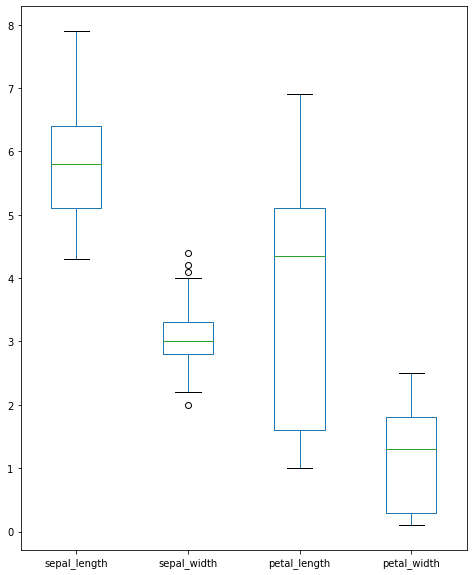

In [ ]:
fig = plt.figure(figsize = (8, 10)) # figsize로 그래프의 figure의 크기를 변경할 수 있다.
data.boxplot(grid=False) # 격자를 없애려면, grid를 False로 둔다.
plt.show()

상자그림을 보면, `sepal_width`열에 4개 이상의 이상치가 있는 것으로 보인다. 

사분위수를 이용하여 이상치를 처리해보자. 이를 위해 데이터프레임iris에 `Lower`, `Upper`, `Outlier`열을 추가해보자.  
* `Lower`열 : `Q1 - 1.5*Q3`를 계산한 값 
* `Upper`열 : `Q3 + 1.5*Q3`를 계산한 값
* `Outlier`열 : `Lower`보다 작거나 `Upper`보다 크면 `True`, 아니면 `False`  

참고) 사분위수는 `quantile()` 메서드로 구할 수 있다. 예를 들어, iris의 `sepal_width`열의 제 1사분위수는 아래와 같이 구할 수 있다. 

In [ ]:
iris['sepal_width'].quantile(q = 0.25)

2.8

`Lower`, `Upper`, `Outlier`열을 추가한 다음, 이상치를 확인해보자.   

주의) 시리즈 또는 데이터프레임에서 여러 개의 불리언 조건을 조합하여 사용할 때는 and와 or 대신 & 와 |을 사용해야 한다.

In [ ]:
iris['Lower'] = iris['sepal_width'].quantile(q = .25) - (1.5*(iris['sepal_width'].quantile(q = .75) - iris['sepal_width'].quantile(q = .25)))
iris['Upper'] = iris['sepal_width'].quantile(q = .75) + (1.5*(iris['sepal_width'].quantile(q = .75) - iris['sepal_width'].quantile(q = .25)))
iris['Outlier'] = (iris['sepal_width'] < iris['Lower']) | (iris['sepal_width'] > iris['Upper'])
iris[iris.Outlier == True]

,sepal_length,sepal_width,petal_length,petal_width,species,Lower,Upper,Outlier
15,5.7,4.4,1.5,0.4,setosa,2.05,4.05,True
32,5.2,4.1,1.5,0.1,setosa,2.05,4.05,True
33,5.5,4.2,1.4,0.2,setosa,2.05,4.05,True
60,5.0,2.0,3.5,1.0,versicolor,2.05,4.05,True


사분위수를 이용하여 4개의 이상치를 확인하였다.  
참고) `df.loc[]`를 사용하여 이상치를 다른 값으로 대체할 수 있다. 

이제 각 그룹별로 `sepal_width`열의 이상치를 확인하는 코드를 작성해보자. 

우선, 상자그림(boxplot)을 그려보자. 

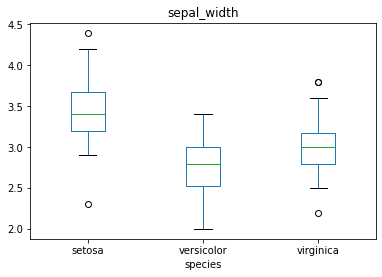

In [ ]:
# sepal_width 자료로 상자그림을 그리기 위해 column은 sepal_width로 둔다.
# by 를 species로 두면, species를 기준으로 그룹화하여 상자그림을 그려준다.
iris.boxplot(column=['sepal_width'],grid = False, by = 'species') 
plt.suptitle('')
plt.show()

상자그림을 살펴보면, `setosa`와 `virginica` 그룹에 각각 2개 이상의 이상치가 있을 것으로 보인다.   
실제로 이상치를 확인해보자. 

우선, 데이터프레임 iris의 `sepal_width`와 `species`열만 가져와서 그룹별로 이상치를 확인하는 방법을 살펴보자.  

In [ ]:
iris = iris.loc[:, ['sepal_width', 'species']]
iris

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa
...,...,...
145,3.0,virginica
146,2.5,virginica
147,3.0,virginica
148,3.4,virginica


각 그룹별로 Lower, Upper를 계산해야 한다. 이를 위해 `transform()`을 사용한다.   
`Lower`, `Upper`, `Outlier`열을 추가한 다음, 이상치를 확인해보자.   


In [ ]:
iris_gp = iris.groupby('species')

iris['Lower'] = iris_gp['sepal_width'].transform(lambda x : x.quantile(q = .25)- 1.5*(x.quantile(q = .75) - x.quantile(q= .25)))
iris['Upper'] = iris_gp['sepal_width'].transform(lambda x : x.quantile(q = .75)+ 1.5*(x.quantile(q = .75) - x.quantile(q= .25)))
iris['Outlier'] = (iris['sepal_width'] < iris['Lower']) | (iris['sepal_width'] > iris['Upper'])
iris[iris.Outlier == True]

,sepal_width,species,Lower,Upper,Outlier
15,4.4,setosa,2.4875,4.3875,True
41,2.3,setosa,2.4875,4.3875,True
117,3.8,virginica,2.2375,3.7375,True
119,2.2,virginica,2.2375,3.7375,True
131,3.8,virginica,2.2375,3.7375,True


`setosa`그룹에는 2개, `virginica`그룹에는 3개의 이상치가 있는 것을 확인할 수 있다.   
참고) `df.loc[]`를 사용하여 이상치를 다른 값으로 대체할 수 있다. 

# 데이터시각화

  * 단어 구름(word cloud)

In [1]:
from wordcloud import WordCloud

워드 클라우드에 한글이 있다면 아래 코드를 실행한다. 

```python
!apt install -y fonts-nanum
!fc-cache -fv

applyfont = "NanumBarunGothic"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
    fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)
```

In [4]:
data = "strawberry banana strawberry apple tomato tomato tomato strawberry strawberry apple"
data

'strawberry banana strawberry apple tomato tomato tomato strawberry strawberry apple'

In [10]:
# 한글이 있다면 font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 추가
wc = WordCloud(background_color= 'white', width = 800, height = 600, prefer_horizontal = True).generate(data)

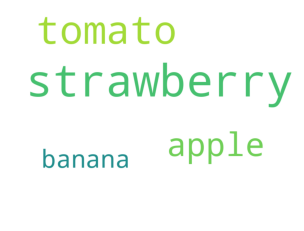

In [9]:
fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 판다스3 요약  

* 판다스 모듈 임포트 : `import pandas as pd`
* 넘파이 모듈 임포트 : `import numpy as np`
---
<font color="red">apply 메서드</font>
* `df.apply()` 메서드 : 데이터프레임의 행 또는 열을 따라 인자로 입력된 함수를 적용
  * `axis = 0` : 열별로 함수를 적용
  * `axis = 1` : 행별로 함수를 적용

예제1)`df.apply(np.sqrt)` # 모든 열에 제곱근 함수를 적용

**주의** : `apply()` 메서드를 사용해도 데이터프레임 `df`는 변하지 않는다.   

예제2) `df.apply(np.sum)` # 각 열에 `np.sum()`함수를 적용. 각 열별로 합을 구함.   
예제3) `df.apply(np.sum, axis = 1)` # 각 행에 `np.sum()`함수를 적용. 각 행별로 합을 구함.   
예제4) `df.apply(lambda x : x + 10)` : 각 열에 인자로 들어온 람다 함수를 적용.  

---
<font color="red">transform 메서드</font>
* `df.transform()` 메서드 : 인자로 입력된 함수에 의해 변환된 값을 가진 데이터프레임을 만듦.
  * `axis = 0` : 열별로 함수를 적용
  * `axis = 1` : 행별로 함수를 적용

예제1)`df.transform(np.sqrt)` # 모든 열에 제곱근 함수를 적용, 모양은 df와 같음.

**주의** : `transform()` 메서드는 집계된 결과를 만들지 못함.
예제2) `df.transfrom(np.sum) # 오류 발생

---
<font color="red">groupby 그룹화</font>  
`df_gp = df.groupby('그룹기준이되는열이름')`
* 그룹별로 특정열의 합을 집계된 결과로 구하기 - `df_gp.apply(np.sum)`
* 그룹별로 특정열의 합을 데이터프레임과 같은 크기로 구하기 - `df_gp.transform(np.sum)`

---
<font color="red">람다lambda 함수</font> 

* 익명함수 또는 lambda 함수 : `lambda arguments : expression`
  * `lambda x : x + 3`  # 숫자를 인자로 받아 3을 더한 값을 반환하는 람다 함수
  * `lambda a, b : a + b`  # 두 숫자를 인자로 받아, 더한 값을 반환하는 람다 함수